# Проект: Исследование стартапов

- Автор:Первушина Юлия
- Дата: 03.04.2025

## Введение

### Цели и задачи проекта
Цель проект подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика. В ходе проекта редстоит принять решения:

- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.

Хорошо, если в процессе работы получится выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

### Описание данных

**Таблица acquisition** содержит информацию о покупках одними компаниями других компаний:

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code — варианты`расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

**Таблица company_and_rounds** содержит информацию о компаниях и раундах финансирования:

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

**Таблица education** содержит информацию об образовании сотрудника:

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

**Таблица people** содержит информацию о сотрудниках:

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

**Таблица degrees** содержит информацию о типе образования сотрудника:

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

**Таблица fund** содержит информацию о фондах:

- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

**Таблица investment** содержит информацию о раундах инвестирования:

- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 

 

<div class="alert alert-warning">


Совет:

    
    
- у тебя тут есть лишний импорт, то что   не использовано   - стоит убрать, чтобы поберечь ресурсы      
 
 

 

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Пока исправлять нечего, но в будущем может пригодиться



In [2]:
# Выгружаем данные в переменные
PATH = "https://code.s3.yandex.net/datasets/"
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
education_df = pd.read_csv(PATH + 'education.csv')
people_df = pd.read_csv(PATH + 'people.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')
fund_df = pd.read_csv(PATH + 'fund.csv')
investment_df = pd.read_csv(PATH + 'investment.csv')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

 
 
- Можно заметить что у нас везде повторяется данный путь https://code.s3.yandex.net/datasets/ , его можно оформить как константу
    
        PATH = "https://code.s3.yandex.net/datasets/"
        acquisition = pd.read_csv(PATH + 'acquisition.csv')
        ....

Так будет и более читабельно, и  будет проще подправить, если изменится url    
    

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат! Спасибо за эту и последующие подсказки. Очень информативные </div>

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Знакомимся с данными и изучаем общую информацию о них.

In [3]:
# Выводим случайные строки датафрейма acquisition_df на экран
acquisition_df.sample(5)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
3793,4229,62198,14098,cash,2200000000,2010-11-22
3325,3739,26365,44638,cash,77000000,2010-08-17
7403,8249,3169,163905,cash_and_stock,2500000,2013-02-11
4601,5063,36312,67338,NaN,0,2011-01-27
4786,5269,45598,71306,NaN,0,2011-03-16


In [4]:
# Выводим информацию о датафрейме acquisition_df на экран
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


В столбце `term_code` большая часть строк с пропусками. Из 9407 строк, только 1831 с данными. Так же небольшое количество пропусков есть в столбце `acquired_at`. Кроме того в `acquired_at` не корректный тип данных, нужно его заменить на **datetime**

In [5]:
# Меняем тип данных для столбца acquired_at в формат datetime
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [6]:
# Выводим первые строки датафрейма company_and_rounds_df на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме company_and_rounds_df на экран
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Названия столбцов приведены в неудобном формате - используется двойной пробел между словами вместо нижнего подчёркивания. Для удобства избавимся от пробелов и заменим их одним нижним подчёркиванием.

Во всех столбцах присутствуют пропуски. Особенно много их в правой части таблицы и их количество почти в каждом столбце одинаково. Вероятно это какая-то техническая ошибка, в дальнейшем нужно будет разобраться подробнее.

Здесь так же некорректные типы данных для столбцов `founded  at`, `closed  at` и  `funded  at` - нужно перевести в тип **datetime**. Для `company ID` и `company id` вероятно лучше подойдёт тип данных **int**.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



    Во всех столбцах присутствуют пропуски. Особенно много их в правой части таблицы и их количество почти в каждом столбце одинаково. Вероятно это какая-то техническая ошибка, в дальнейшем нужно будет разобраться подробнее.


Очень хорошее наблюдение, можно было развить эту тему.  Причина не в технической ошибке    
    
    
<div class="alert alert-warning">
 

Совет 🤔:
    
    
    
    
- Лучше пропуски вывести в абсолютных и относительных цифрах  (и лучше поместить в одну табличку, для компактности)  

    
 
 

    
- Либо можно визуализировать пропуски с помощью библиотеки [missingno](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/), выглядит красиво
    
А главное мы поймём структуру пропусков в company_and_rounds, а это важно для последнего раздела первой части. Посоветовал бы использовать  msno.matrix(),  и там бы мы увидели кластеры пропусков.   Это   мощная подсказкой для  последнего раздела первой части    
    
    
Также у missingno есть дополнительный функционал

    msno.heatmap(df)

Так можно посмотреть на корреляцию между пропусками в разных столбцах, это может подсказать как образовались многие наши пропуски

 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Да, это оказался классный инструмент. Я применила эти методы ниже, там где нужно будет обрабатывать эту таблицу. Надеюсь верно поняла как расшифровывать эти визуализации. </div>

In [8]:
# Избавимся от пробелов в названиях столбцов в company_and_rounds_df с помощью метода str.replace()
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_')
company_and_rounds_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике 


И здорово что используешь автоматизированный подход 
    
 <div class="alert alert-warning">


Совет: 


Правда змеиный стиль предполагает все буквы прописными (но главное не допустить двойственности Когда у нас два столбца имеют одинаковое название)
     
     
       
   




In [9]:
# Меняем тип данных для столбцов founded_at, closed_at, funded_at  в формат datetime
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors='coerce')
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], errors='coerce')
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='coerce')
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 
    
<div class="alert alert-warning">



Совет 🤔:


 
    
- Ещё можно было хитро автоматизировать приведение к нужному типу,  заметив что все столбцы которые нужно привести к типу datetime содержат "_at". Реализовать это можно по-разному, например использовать функцию в функций. Одна функция - это двойной цикл (Пробегается по всем датсетам а в каждом датасете по всем столбцам),  а в качестве аргумента в ней подаём другую функцию, которая в отношении столбца делает нужную операцию (Одна функция приводит к верному типу данных, другая работает со стилистикой название столбцов итп). Если не очень знакома тема функций, то ниже написал шаблончик можешь поиграться, добавив к   process_to_datetime, какие-то другие функции, которые ты хочешь применить к каждому столбцу какждого датасета - например поискать столбец в котроом содержится network_username (У нас есть такое задание)
	
	


		# код ревьюера


		# Пример функции для обработки столбца
		def process_to_datetime(column):
			"""
			Функция, которая выполняет действия над столбцом.
			Например, преобразует столбцы с '_at' в datetime.
			"""
			if '_at' in column.name:  # Проверяем, содержит ли название столбца '_at'
				return pd.to_datetime(column)  # Преобразуем в datetime
			return column  # Возвращаем столбец без изменений

		# Основная функция для обработки датасетов
		def process_datasets(dataset_dict, column_processor):
			"""
			Функция, которая проходит по каждому датасету в словаре и каждому столбцу,
			применяя к ним функцию column_processor.
			"""
			for dataset_name, dataset in dataset_dict.items():  # Проходим по каждому датасету в словаре
				for column_name in dataset.columns:  # Проходим по каждому столбцу
					dataset[column_name] = column_processor(dataset[column_name])  # Применяем функцию
			return dataset_dict

		# Пример данных (создаём несколько датасетов для демонстрации)
		data1 = pd.DataFrame({
			'created_at': ['2023-01-01', '2023-02-01'],
			'updated_at': ['2023-01-02', '2023-02-02'],
			'value': [10, 20]
		})

		data2 = pd.DataFrame({
			'start_at': ['2023-03-01', '2023-04-01'],
			'end_at': ['2023-03-02', '2023-04-02'],
			'price': [100, 200]
		})

		# Словарь датасетов
		dataset_dict = {
			'dataset1': data1,
			'dataset2': data2
		}

		# Обрабатываем датасеты
		processed_datasets = process_datasets(dataset_dict, process_to_datetime)

		# Выводим результат
		for dataset_name, dataset in processed_datasets.items():
			display(f"Датасет '{dataset_name}':")
			display(dataset)
 

In [10]:
# Выводим первые строки датафрейма education_df на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [11]:
# Выводим информацию о датафрейме education_df на экран
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Для столбца `graduated_at` - тип данных нужно перевести в **datetime**. Так же в этом столбце половина данных с пропусками, но скорее всего это связано с тем, что либо процесс образования ещё не завершён либо его вовсе нет.

In [12]:
# Меняем тип данных для столбца graduated_at в формат datetime
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [13]:
# Выводим первые строки датафрейма people_df на экран
people_df.head(5)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [14]:
# Выводим информацию о датафрейме people_df на экран
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Типы данные верные. В столбцах `company_id` и `network_username` большая часть - пропуски. Для столбца `company_id` такое количество пропусков выглядит критичным. Пока сложно сказать по какой причине для такого количества людей не определен id команиии, к которой он относится.

In [15]:
# Выводим первые строки датафрейма degrees_df на экран
degrees_df.head(5)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Судя по всему в значениях столбца `object_id` есть лишние символы  **p:**, т.к. если сравнить данные в этом столбце с первыми `person_id` в таблице `education_df` они совпадают и скорее всего являются общии ключом для этих таблиц.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍верное замечание


 

In [16]:
# Выводим информацию о датафрейме education_df на экран
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


 Пропуски в столбцах `degree_type` и `subject` могут быть связаны с отстуствием образования у сотрудника.

В ходе знакомства с данными были заменены типы данных на **datetime64** для столбцов с датами. На текущем этапе все пропуски оставим как есть, т.к. рано принимать решение о том, что с ними делать и приступим к более детальному исследованию и предобработке данных. 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Предварительная работа проведена


     
<div class="alert alert-warning">

Совет 🤔:

 

- Можно было найти опечатку 


- Можно было дополнительно сконцентрировать внимание на     company  ID и company  id. Почему такие одинаковые названия, что за этим стоит? Сделать проверку насколько они совпадают. Можно красиво это увидеть с помощью (схема) 


	first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
	second_id = set(company_and_rounds_df['company  id'].dropna().unique())
	# Строим диаграмму Венна
	venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

	# Отображаем график
	plt.title("Пересечение ")
	plt.show() 
	
	
 
		
	

- Можно найти  пропуски, которые  прочитались как строка "nan", и подправить это ндоразумение  в company_and_rounds и в fund  

 

 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [17]:
# Извлекаем год из столбца funded_at
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year

In [18]:
# Создаем сводную таблицу
pivot_table_rounds = company_and_rounds_df.pivot_table( values='raised_amount',
                                                        index='funded_year',
                                                        aggfunc={'raised_amount': ['median', 'count']})

In [19]:
# Переименовываем столбцы для наглядности
pivot_table_rounds.columns = ['number_of_funding_rounds', 'median_raised_amount']

In [20]:
# Создаем новый столбец total_amount_funding
pivot_table_rounds['total_amount_funding'] = pivot_table_rounds['median_raised_amount'] * pivot_table_rounds['number_of_funding_rounds']

In [21]:
# Фильтруем строки, где number_of_funding_rounds больше 50
pivot_table_rounds = pivot_table_rounds[pivot_table_rounds['number_of_funding_rounds'] > 50]

In [22]:
# Создаем новый столбец total_amount_funding где находим общую сумму инвестирования
pivot_table_rounds['total_amount_funding'] = pivot_table_rounds['median_raised_amount'] * pivot_table_rounds['number_of_funding_rounds']

In [23]:
# Сортируем по году
pivot_table_rounds = pivot_table_rounds.sort_index()

In [24]:
# Выводим результат
pivot_table_rounds

,number_of_funding_rounds,median_raised_amount,total_amount_funding
funded_year,,,
1999.0,76,2000000.0,1.520000e+08
2000.0,125,4200000.0,5.250000e+08
2001.0,96,3000000.0,2.880000e+08
2002.0,116,4200000.0,4.872000e+08
2003.0,159,3000000.0,4.770000e+08
2004.0,291,5000000.0,1.455000e+09
2005.0,1633,5500000.0,8.981500e+09
2006.0,2436,5000000.0,1.218000e+10
2007.0,3279,3973320.0,1.302852e+10


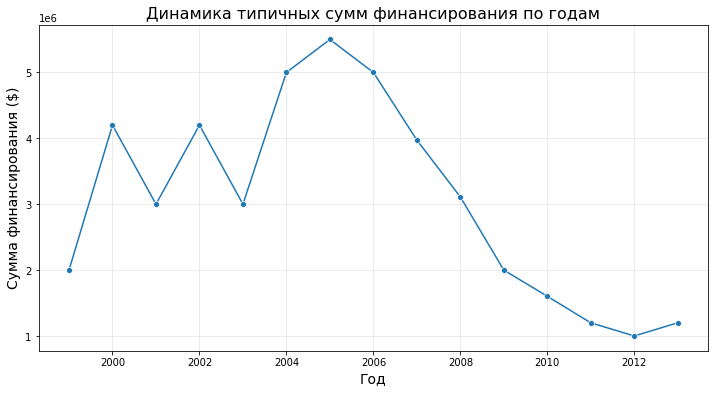

In [25]:
# Создаем линейный график
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=pivot_table_rounds.index,
    y=pivot_table_rounds['median_raised_amount'],
    marker='o')

# Оформляем график
plt.title('Динамика типичных сумм финансирования по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Сумма финансирования ($)', fontsize=14)
plt.grid(True, alpha=0.3)

# Отображение графика
plt.show()

По графику видно, что с 1999 по 2005 год тенденция типичной суммы финансирования была не стабильной, но в целом росла. Достигнув в 2005 своего пика начала стабильно падать вплоть до 2012 года, но с к 2013 снова начала расти. При этом количество раундов финансирования всегда стабильно шло вверх и  к 2013 году стало равно 11072, что в 145 раз больше, чем в 1999 году, где число раундов равнялось 76.

Теперь сравним типичную сумму финансирования с общей суммой, чтобы лучше понять ситуацию на рынке инвестиций в стартапы.

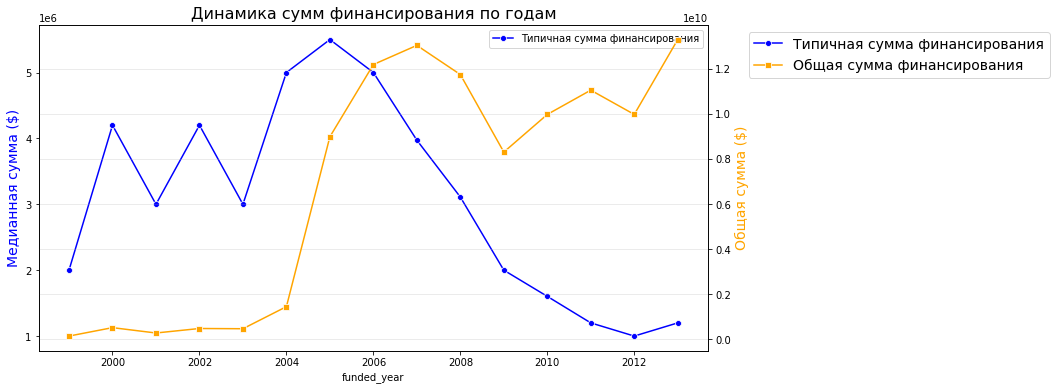

In [26]:
# Создаем фигуру и основной axes
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # получаем текущий axes

# Строим первую линию (median_raised_amount) на основной оси
line1 = sns.lineplot(
    x=pivot_table_rounds.index,
    y=pivot_table_rounds['median_raised_amount'],
    marker='o',
    color='blue',
    label='Типичная сумма финансирования'
)

# Создаем вторую ось y
ax2 = ax1.twinx()  # создаем вторую ось, связанную с первой

# Строим вторую линию (total_amount_funding) на второй оси
line2 = sns.lineplot(
    x=pivot_table_rounds.index,
    y=pivot_table_rounds['total_amount_funding'],
    marker='s',
    color='orange',
    label='Общая сумма финансирования',
    ax=ax2
)

# Настраиваем метки для обеих осей
ax1.set_ylabel('Медианная сумма ($)', color='blue', fontsize=14)
ax2.set_ylabel('Общая сумма ($)', color='orange', fontsize=14)

# Создаем объединенную легенду
lines = line1.lines + line2.lines
labels = [line.get_label() for line in lines]

# Размещаем легенду за пределами графика
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=14)

# Оформляем график
plt.title('Динамика сумм финансирования по годам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.grid(True, alpha=0.3)

# Отображение графика
plt.show()

По графику видно, что, рынок инвестирования начал резко расти с 2004 года, достиг пика к 2007 и находился примерно на одном уровне с периодическими падениями и взлётами вплоть до 2012 года. А вот к 2013 тоже резко пошёл вверх как сумма финансирования на раунд. 
Т.к. в целом рынок оставался на одном уровне в тот период, когда типичная сумма финансирования шла только вниз, нельзя сказать, что падение было связано с потерей интереса к инвестированию в стартапы. Получается, что общая сумма просто дробилась на бОльшее количество проектов, а вот к 2013 интерес к инвестированию однозначно вырос - выросло и количество проектов и суммы которые в них были инвестированы.

 
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Данные подготовлены верно, но график построен не по тому столбцу, как и > 50. В общем вот тут неправильный порядок
    
    
    
    ['median_raised_amount', 'number_of_funding_rounds']
    
     

    
<div class="alert alert-warning">

Совет 🤔:

    
 
    
- По оси Y пишем в чём измеряются цифры   	
	
	
 
    
    
- Когда имеем дело с временными рядами, есть такой классический инструмент как скользящая средняя. Тенденции очевидны и так, но если хочешь можешь наложить, для сглаживания     
    
    
    
- Кстати тут можно добавить коэффициент дефляции,  ведь покупательная способность одного доллара в 2000 и 2013 года разная. Такой вот экономический аспектик     
    
     


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 



Можно углубить анализ, ведь тут очень интересная тенденции.  
    
Представь, что ты аналитик в венчурной компании. Ваш босс говорит: 'Инвестиции в стартапы растут/падают, но я хочу понять, за счёт чего это происходит. Может, мы просто стали чаще/реже вкладывать деньги? Или мы стали вкладывать больше/меньше в каждый раунд? Или и то, и другое?'

Ваша задача:

Посчитайте количество раундов инвестирования каждый год (x).

Определите средний размер инвестиций в каждом раунде (y).

Сравните их с общим объёмом инвестиций (z).

Сделайте вывод: что больше влияет на рост — количество сделок или их размер?".  То есть я тебе предлагаю разложить z:     
    
    
    
    z = x*y
 
    
Предлагаю проанализировать с этой точки зрения,  и тогда мы сможем заметить нечто большее чем  "финансирование за раунд последние годы падает", и ответить на главный вопрос - "рынок инвестиций в стартапы на подъёме или на спаде, и за счёт чего" 

Тут лучше дополнительно построить график по количеству раундов, и суммарным инвестициям
 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправила график. И попробовала воспользоваться твоим советом. Совсем по другому заиграли данные. Спасибо!) </div>


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [27]:
# Объединяем таблицы people.csv и education.csv
merged_df_people = people_df.merge(education_df, left_on='id', right_on='person_id', how='left')
merged_df_people.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍Верно


 

<div class="alert alert-warning">
 


Совет 🤔:


- Можно добавить suffixes = ('_people','_education'), и будет чётче видно
    
    
    id_x  ---- > id_people
    id_y  ---- > id__education
    
    
 

- Можешь посмотреть на сотрудников company_id' == 1,  и обнаружишь там несколько раз Kevin	Flaherty,  получается ты одного и того же человека посчитала два раза.  И в стартапе в котором на самом деле два человека Alex Weinstein и Kevin Flaherty, у тебя 3 
   
И в результате наши данные немножко исказятся
 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Ниже я добавила удаление дубликатов, но по моему всё равно не помогло. И стоило ли это вообще делать тоже не уверена теперь. Что было правильней сделать, чтобы не считать лишних людей в таком случае? </div>

In [28]:
# Выводим информацию о датафрейме merged_df_people на экран
merged_df_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


Перед тем как начать делать на категории, удалим явные дубликаты из таблицы merged_df_people

In [29]:
# Количество строк до удаления в таблице merged_df_people
initial_row_count = merged_df_people.shape[0]
print(f"Исходное количество строк: {initial_row_count}")

# Удаляем дубликаты, используя указанные столбцы
merged_df_people = merged_df_people.drop_duplicates(subset=['first_name', 'last_name', 'company_id', 'network_username'], keep='first')

# Количество строк после удаления
final_row_count = merged_df_people.shape[0]
print(f"Количество строк после удаления: {final_row_count}")

Исходное количество строк: 267694
Количество строк после удаления: 218400


Будем считать, что если у сотрудника в обоих столбцах `instituition` и `graduated_at` пустые значения, значит образование отсутствует. Для удобства создадим новый столбец с признаком наличия или отсутсвия образования, где **True** - отсутсвие образования и **False** - наличие.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



логика понятная


 

In [30]:
# Создаем новый столбец 'no_education'
merged_df_people['no_education'] = (merged_df_people['instituition'].isna() & merged_df_people['graduated_at'].isna())
merged_df_people.sample(5)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,no_education
95986,196732,Pavan,K. S,NaN,NaN,NaN,NaN,NaN,NaT,True
47069,152694,Ashley,Willhite,NaN,NaN,NaN,NaN,NaN,NaT,True
127342,222165,Morris,Bryant,NaN,NaN,NaN,NaN,NaN,NaT,True
219356,54408,Joseph,May,NaN,NaN,NaN,NaN,NaN,NaT,True
128372,222979,Geoff,Meagher,223516.0,NaN,NaN,NaN,NaN,NaT,True


Чтобы разделить компании на группы по количеству сотрудников, для начала посчитаем количество сотрудников для каждой компании. Для этого воспользуемся группировкой.

In [31]:
# Создаем сводную таблицу
company_employee_count = pd.pivot_table(
    merged_df_people,
    index=['company_id'],
    values=['id_x'],
    aggfunc='count',
    fill_value=0
)

# Переименовываем столбец с количеством
company_employee_count = company_employee_count.rename(columns={'id': 'employee_count'})

# Выводим результат
company_employee_count

# Создаем сводную таблицу
company_employee_count = pd.pivot_table(
    merged_df_people,
    index=['company_id'],
    values=['id_x', 'no_education'],
    aggfunc={'id_x': 'count', 'no_education': 'sum'},
    fill_value=0
)

# Переименовываем столбцы
company_employee_count = company_employee_count.rename(columns={
    'id_x': 'employee_count',
    'no_education': 'no_education_count'
})

# Выводим результат
company_employee_count

,employee_count,no_education_count
company_id,,
1.0,2,1
2.0,1,0
3.0,3,1
4.0,13,1
5.0,61,16
...,...,...
285897.0,2,0
285953.0,1,1
285972.0,2,1


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Понятный, удобный для восприятия код


 

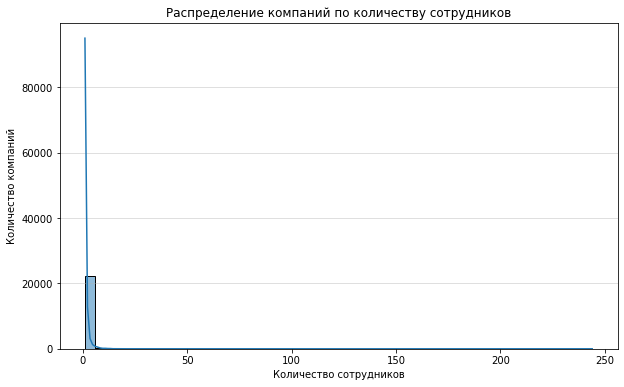

In [32]:
# Гистограмма распределения количества сотрудников
plt.figure(figsize=(10, 6))
sns.histplot(
    data=company_employee_count,
    x=company_employee_count['employee_count'],
    bins=50,
    kde=True)

plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.grid(axis='y', alpha=0.5)
plt.show()

По гистограмме можно сделать вывод, что в подавляющем числе компаний числится не более 1-5 людей. Судя по сводной таблице, очень часто попадаются компании с единственным человеком. Вероятно это ИП. Чтобы было нагляднее, что происходит с числом сотрудников в остальных компаниях, отсеим компании с маленьким числом сотрудников и построим гистограмму ещё раз.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Здорово Что обратил внимание на особенности распределения, границы корзинок получились удачными


 
    
<div class="alert alert-warning">



Совет 🤔:


- Я бы посоветовал  построить countplot. Мы же имеем дело с дискретным значением, для них мы не используем гистограммы. И будет видно гораздо лучше  

In [33]:
# Фильтруем компании с более чем 5 сотрудниками
more_people_company = company_employee_count[company_employee_count['employee_count'] > 5]

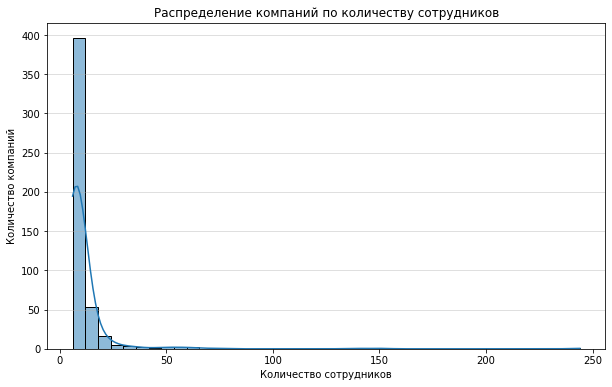

In [34]:
# Строим гистограмму распределения количества сотрудников
plt.figure(figsize=(10, 6))
sns.histplot(
    data=more_people_company,
    x=more_people_company['employee_count'],
    bins=40,
    kde=True)

plt.title('Распределение компаний по количеству сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.grid(axis='y', alpha=0.5)
plt.show()

Теперь можно увидеть, что следующий по численности кластер компаний, там где количество сотрудников 5-10. В целом можно разделить компании на следующие сегменты:

- ИП - 1 сотрудник
- малая компания - 2-10 сотрудников
- средняя компания - 11-35 сотрудников
- большая компания - больше 36 сотрудников

Для каждой группы посчитаем количество компаний и долю сотрудников без образования.

In [35]:
# Разбиваем на категории с помощью пользовательской функции categorize
def categorize(value):
    if value == 1:
        return 'ИП'
    elif 2 <= value < 10:
        return 'малая компания'
    elif 11 <= value < 35:
        return 'средняя компания'
    elif value >= 36:
        return 'большая компания'
    #else:
        #return ''

# Применение функции к данным
company_employee_count['size_company'] = company_employee_count['employee_count'].apply(categorize)
company_employee_count

,employee_count,no_education_count,size_company
company_id,,,
1.0,2,1,малая компания
2.0,1,0,ИП
3.0,3,1,малая компания
4.0,13,1,средняя компания
5.0,61,16,большая компания
...,...,...,...
285897.0,2,0,малая компания
285953.0,1,1,ИП
285972.0,2,1,малая компания


In [36]:
# Группируем по размеру компании
grouped_by_size = company_employee_count.groupby('size_company').agg({
    'employee_count': 'count',  # Количество компаний
    'no_education_count': 'sum'  # Сумма сотрудников без образования
})

# Считаем общее количество сотрудников по каждой категории
grouped_by_size['total_employees'] = company_employee_count.groupby('size_company')['employee_count'].sum()

# Считаем долю сотрудников без образования
grouped_by_size['no_education_percent'] = (
    grouped_by_size['no_education_count'] / 
    grouped_by_size['total_employees'] * 100
)

# Переименовываем столбец
grouped_by_size = grouped_by_size.rename(columns={'employee_count': 'companies_count'})

# Форматируем вывод
grouped_by_size = grouped_by_size.reset_index()
grouped_by_size = grouped_by_size[['size_company', 'companies_count', 'no_education_count', 'total_employees', 'no_education_percent']]
grouped_by_size = grouped_by_size.sort_values(by='companies_count', ascending=False)

# Округление доли
grouped_by_size['no_education_percent'] = grouped_by_size['no_education_percent'].round(2)

# Выводим результат
grouped_by_size

,size_company,companies_count,no_education_count,total_employees,no_education_percent
0,ИП,18126,8387,18126,46.27
2,малая компания,4651,6630,13555,48.91
3,средняя компания,106,695,1571,44.24
1,большая компания,13,294,1061,27.71


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


total_employees неверно подсчитан

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправила </div>

Больше половины компаний это ИП с единственным сотрудником. Среди них для 46% не указано наличие образования. Далее по численности следуют малые компании. Доля сотрудников без образования в них 49%. Средних и больших компаний в разы меньше: 106 и 13 соответственно. В средних компаниях сохраняется та же тенденция с сотрудниками без образования - 44%. А в больших компаниях этот процент ниже - 28% 

Оценим, возможно ли присоединить к этим таблицам ещё таблицу `degrees.csv`. Для присоединения таблицы будем использовать столбец `object_id`. Но сначала его нужно будет обработать. При первом знакомсте было видно, что в этом столбце есть лишний символ **p:** и тип данных для этого столбца **object**. Обработаем его приведя в нужный вид для присоединения.

In [37]:
# Удаляем символы 'p:' из столбца object_id
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '')

# Преобразуем столбец в тип int
degrees_df['object_id'] = degrees_df['object_id'].astype(int)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Верно подготовила object_id


 

In [38]:
# Объединяем таблицы merged_df_degrees и education_df
merged_df_degrees = merged_df_people.merge(degrees_df, left_on='id_x', right_on='object_id', how='left')
merged_df_degrees

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,no_education,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,False,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,True,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,True,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,True,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,True,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258413,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,True,NaN,NaN,NaN,NaN
258414,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,False,25958.0,174088.0,M.B.B.S.,Medicine
258415,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,False,18871.0,118386.0,PhD,Journalism
258416,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,True,NaN,NaN,NaN,NaN


In [39]:
merged_df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258418 entries, 0 to 258417
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              258418 non-null  int64         
 1   first_name        258413 non-null  object        
 2   last_name         258417 non-null  object        
 3   company_id        44767 non-null   float64       
 4   network_username  50631 non-null   object        
 5   id_y              106538 non-null  float64       
 6   person_id         106538 non-null  float64       
 7   instituition      106488 non-null  object        
 8   graduated_at      57603 non-null   datetime64[ns]
 9   no_education      258418 non-null  bool          
 10  id                106538 non-null  float64       
 11  object_id         106538 non-null  float64       
 12  degree_type       95585 non-null   object        
 13  subject           79154 non-null   object        
dtypes: b

Удачно. Удалось присоединить таблицу `degrees.csv` Размерность таблицы увеличилась примерно на 100 000 строк. Вероятно есть сотрудники у которых не одно образование и они имеют несколько специальностей.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Для решения используем метод пересечения множеств. Найдём общее количество одинаковых значений, которые находятся в обеих таблицах `company_and_rounds` и `people` в столбце `network_username` и найдём долю этих значений от общего количества значений в каждой из таблиц.

In [40]:
# Пересечение уникальных значений
common_values = set(company_and_rounds_df['network_username']).intersection(set(people_df['network_username']))
print(f"Количество общих значений: {len(common_values)}")

# Процент общих значений
pct_common_df1 = len(common_values) / company_and_rounds_df['network_username'].nunique()
pct_common_df2 = len(common_values) / people_df['network_username'].nunique()
print(f"Доля общих значений в первом датасете: {pct_common_df1:.2%}")
print(f"Доля общих значений во втором датасете: {pct_common_df2:.2%}")

Количество общих значений: 2200
Доля общих значений в первом датасете: 2.76%
Доля общих значений во втором датасете: 5.73%



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- 👍 за использование set


-  &/.intersection 


<div class="alert alert-warning">
 

Совет:


- Только перед тем как использовать set, стоит убрать пропуски, потому что с точки зрения set, один пропуск не равен другому пропуску,  поэтому будет не совсем корректный расчёт. А главное - наличие пропуска сильно замедляет расчёты
    
     

В результате видно, что пересечиний мало. для таблицы  `company_and_rounds` это 2,8%  и `people` 5,7%. Можно сделать вывод, что эти столбцы имеют разные данные, и использовать их для объединения таблиц нельзя.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍  согласен с анализом,  главная проблема указана


 
<div class="alert alert-warning">



Совет 🤔:


    
- Тут можно было начать с учёта контекста.  network_username в таблице people относятся к сотрудникам, а в таблице company_rounds к компаниям. Возможно случаи когда компании названы в честь человека, и тогда можно поймать пересечения.  Но в целом это не выглядит перспективно    
    
  
- Можно добавить красивую визуализацию,  для демонстрации    пересечения данных. Это можно сделать с помощью диаграммы Венна   
    
    
    !pip install matplotlib-venn -q
    from matplotlib_venn import venn2, venn3 #(venn3 - Это если сразу три кругляшка построить)
    import matplotlib.pyplot as plt

    # Строим диаграмму Венна
    venn2([set(['user1', 'user2', 'user3', 'user4', 'user5']), set(['user3', 'user4', 'user6', 'user7'])], set_labels=('Company Users', 'Fund Users'))

    # Отображаем график
    plt.title("Пересечение пользователей Company Users и Fund Users")
    plt.show()    
    
    
- network_username еще встречается в fund_df 
    
   
     


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Ещё раз посмотрим внимательней таблицу `company_and_rounds.csv`

In [41]:
pd.set_option('display.max_columns', 500)

In [42]:
company_and_rounds_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


Визуально эта таблица выглядит как результат склеивания двух таблиц. Первая таблица начиная со столбца `company_ID`	и заканчивая столцом `milestones`, и вторая таблица начиная с `funding_round_id`. В правой половине таблицы тоже есть столбец `company_id` по которому видно, что и в `company_ID` и в `company_id` одни и те же данные, там где они присутствуют в обоих столбцах. Левая половина датасета с общей информацией о компании, а правая уже с информацией о раундах.

Ещё при первом знакомстве с таблицей, была замечена особенность в распределении пропусков - в правой части таблицы их очень много и их количество почти в каждом столбце одинаково. Изучим пропуски поподробнее используя библиотеку `missingno`

In [43]:
# Устанавливаем и загружаем библиотеку missingno
!pip install missingno
import missingno as msno 

<AxesSubplot:>

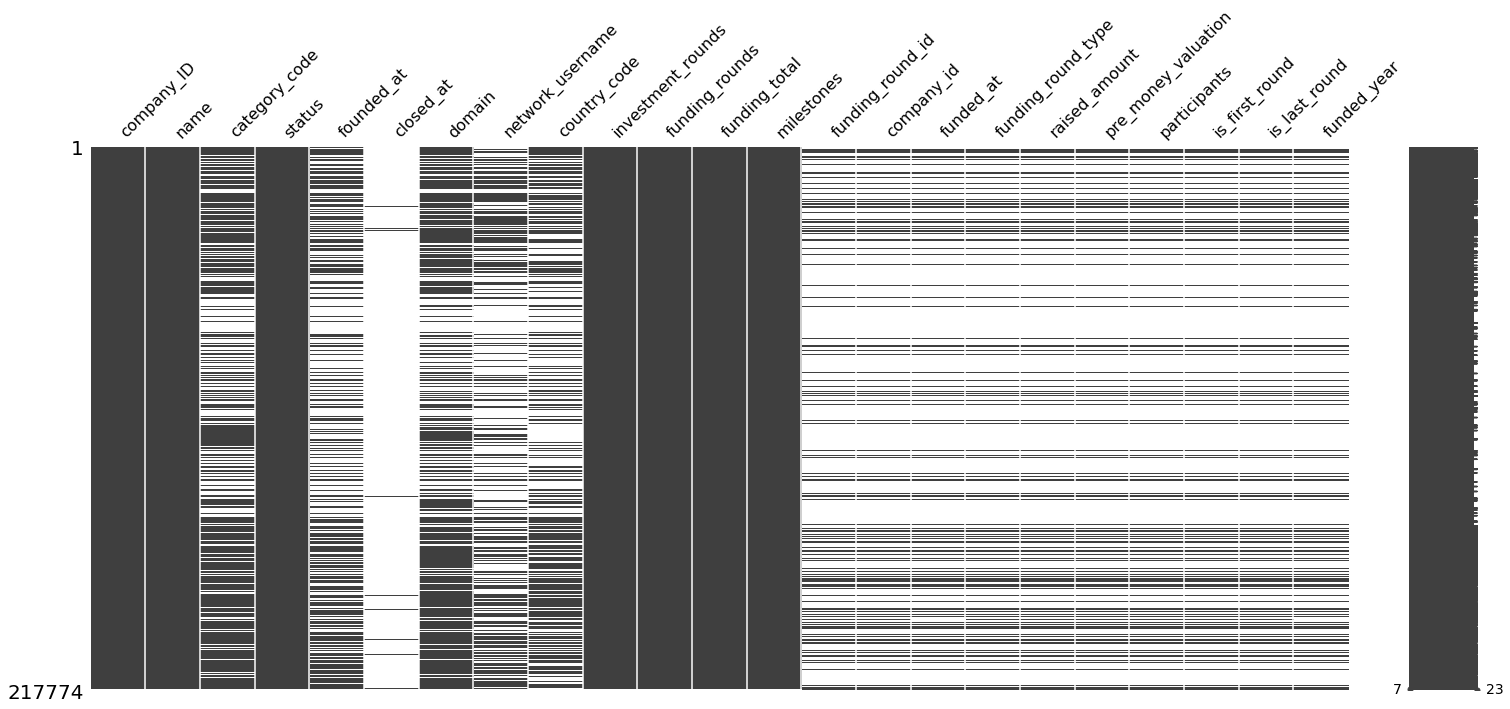

In [44]:
#Строим матрицу пропусков
msno.matrix(company_and_rounds_df)

Наглядно видно, что правая часть имеет целые серии строк с пустыми значениями как раз начиная со столбца `funding_round_id`

<AxesSubplot:>

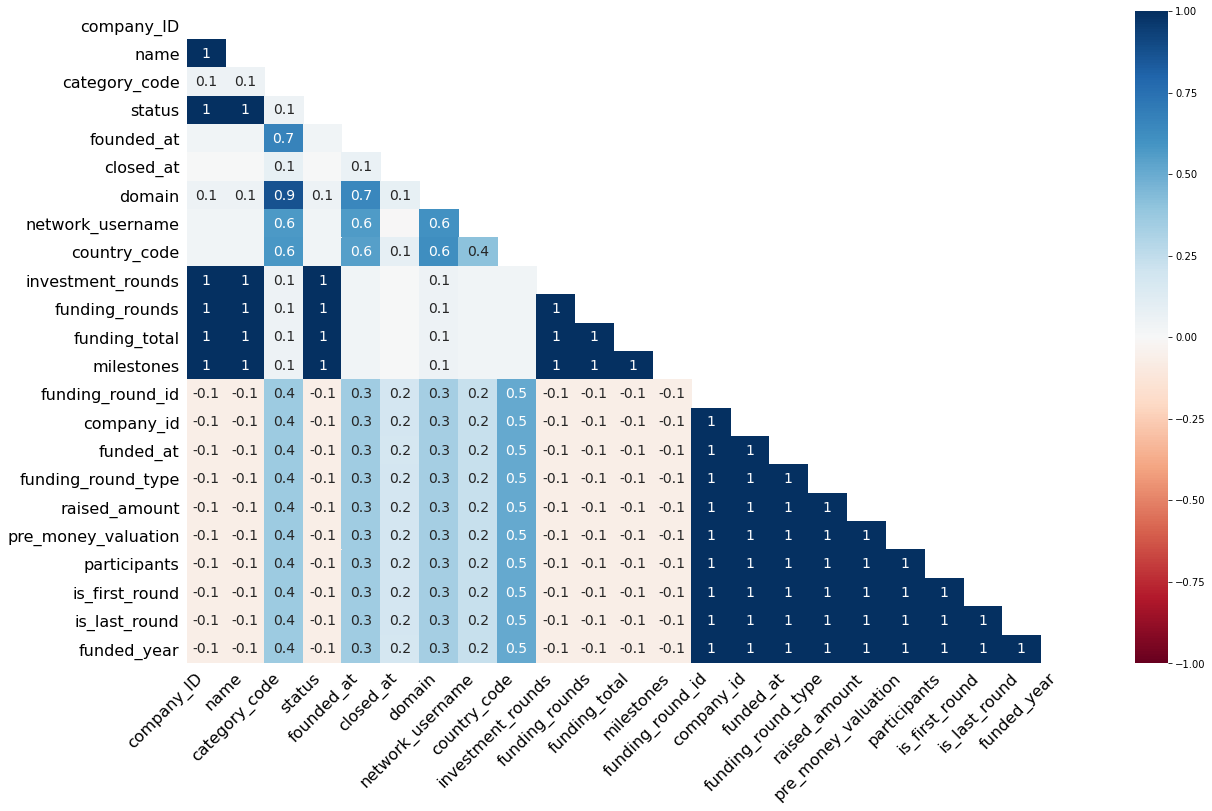

In [45]:
#Строим тепловую карту пропусков
msno.heatmap(company_and_rounds_df)

Эта визуализация показывает корелляцию пропусков между столбцами. Значение около 0 означает, что нет зависимости между появлением пропущенных значений двух переменных. Здесь так же чётко видны границы, где пропуски левой и правой частей таблицы не имеют между собой взимосвязи. А значит эти таблицы можно спокойно разделить.

Все эти признаки подтверждают версию о том, что это две таблицы, которые были соединены.

Чтобы получить нужную таблицу разделим company_and_rounds_df и удалим дубликаты из нужной (левой) части таблицы

In [46]:
#Создадим копию таблицы company_and_rounds_df для того, чтобы потом делить её
copy_company_and_rounds_df = company_and_rounds_df

# Выделяем необходимые столбцы для первого датафрейма company
company_info = copy_company_and_rounds_df[['company_ID', 'name', 'category_code', 'status','founded_at','closed_at','domain','network_username','country_code','investment_rounds','funding_rounds','funding_total','milestones']] 

# выделяем необходимые столбцы для второго датафрейма rounds
rounds_info = copy_company_and_rounds_df[['funding_round_id', 'company_id', 'funded_at','funding_round_type','raised_amount','pre_money_valuation','participants','is_first_round','is_last_round','funded_year']]

In [47]:
company_info

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
rounds_info

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


Удалим все явные дубликаты из таблицы company_info и получим требуемую таблицу

In [49]:
# Количество строк до удаления в таблице company_info
initial_row_count = company_info.shape[0]
print(f"Исходное количество строк: {initial_row_count}")

# Удалим явные дубликаты и получим нужную таблицу
company_info_new = company_info.drop_duplicates(keep='first')

# Количество строк после удаления
final_row_count = company_info_new.shape[0]
print(f"Количество строк после удаления: {final_row_count}")

# Выводим на экран
company_info_new

Исходное количество строк: 217774
Количество строк после удаления: 196554


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

Зачем опять объединять?
 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:








Верное решение о разделении на две таблицы, но зачем ты опять начала их объединять?  Обрати внимание new_company_and_rounds_df содержит дубликаты (Посмотри первые три строчки - Wetpaint), поэтому когда ты будешь проводить анализ ты одну и ту же цифру будешь считать несколько раз,  что исказит результаты. В общем нас   другое просят сделать 
    
    
Одним словом - берём company_info, и дропаем полные дубликаты. Это будет тот самый dataset о котором нам просят   
    
    
<div class="alert alert-warning">


Совет 🤔:


  
- можно найти еще 5-6 подсказок, указывающих что company_rounds  был слеплен из двух меньше таблиц). В этом случае твоё решение будет более обоснованным и понятным      
    
 
    
- Было бы правильно сбросить индексы, это делает таблицу более понятной и удобной для дальнейшего анализа 
    
	
	
- Можно проанализировать какие нам данные понадобятся ниже, и убрать неунжные столбцы (заказчиком может смутить ненужная информации в данных)  	

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Задачу 2.4 поправила. Добавила ещё причины, по которым стоит разделить таблицы, используя посоветованную тобой библитеку missingno. После разделения взяла в работу только левую таблицу с информацией по компаниям и удалила все явные дубликаты. Первоначально неверно поняла, что требуется. </div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Юлия, у тебя старательно выполненная работа, всё чётко, осмысленно. Выводы присутствуют, они чёткие и подробные, графики оформлены аккуратно  

    
Нет проблем с комментированием кода, тем, кто будет работать с твоим кодом, будет понятен ход твоих мыслей и логика  

Хорошая работа с данными, поддерживаю, что не стала использовать заглушку/заполнение данных там, где не нужно  

Использовала оптимальные методы  
 
    
Я оставил небольшие советы и вопросы (если есть время и желание, можешь воспользоваться/ответить) 
    
    
    
**Обязательное к исправлению**:  

    
     
- Перепутала столбцы    
    
- Неверно подсчитан total_employees    
    
- Нам нужен dataset где каждая строка - это одна компания
    
    
Исправляем ошибки, и можешь приступать к исследовательскому анализу  

<div class="alert alert-warning">

Совет 🤔:

    
    
И так как многие студенты ошибаются в трактовке (и пишут анализ не по тому датасету), сразу хочу указать для 1 пункта во второй части на подсказку в брифе: результатом "Объединение данных" должна быть таблица с 40.000 примеров (``funding_rounds`` > 0 ИЛИ ``investment_rounds`` > 0 ИЛИ ``status`` == acquired)  

    
    
А также обрати внимание в брифе: "Далее работайте только с этими данными".  

    
Это как раз об этом сорокатысячнике. Пишу, чтобы не оказалось, что будут сделаны выводы совсем по другому датасету


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [50]:
# Объединим полученную после разделения таблицу о компаниях company_info_new c таблицей acquisition
new_company_and_rounds_df = pd.merge(
    left=company_info_new,
    right=acquisition_df,
    how='left', 
    left_on='company_ID',  
    right_on='acquired_company_id',)

new_company_and_rounds_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196692,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
196693,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT
196694,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
196695,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0,6968.0,5.0,43233.0,cash_and_stock,1.010470e+09,2012-04-09


In [51]:
# Создаем маску для фильтрации
mask = (
    (new_company_and_rounds_df['funding_rounds'] > 0) | 
    (new_company_and_rounds_df['investment_rounds'] > 0) | 
    (new_company_and_rounds_df['status'] == 'acquired')
)

# Применяем маску к датафрейму
company_and_rounds_df_new = new_company_and_rounds_df[mask]

# Выводим результат
company_and_rounds_df_new

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.000000e+00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196687,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
196688,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
196692,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
196693,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT


In [52]:
company_and_rounds_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id             


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

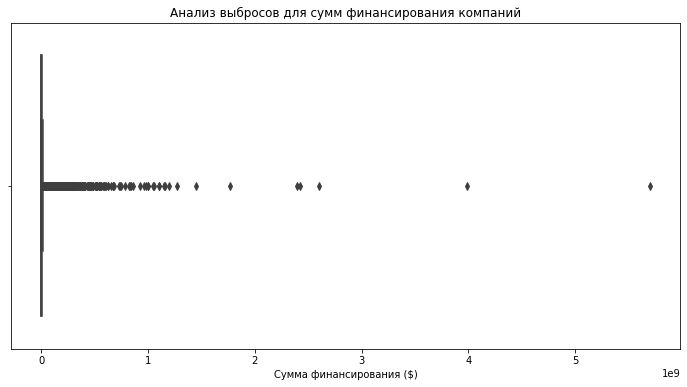

In [53]:
# Ящик с усами
plt.figure(figsize=(12, 6))
sns.boxplot(x=company_and_rounds_df_new['funding_total'])
plt.title('Анализ выбросов для сумм финансирования компаний')
plt.xlabel('Сумма финансирования ($)')
plt.show()

Судя по боксплоту в столбце `funding_total` есть огромное число выбросов.

Посмотрим дополнительную информацию с помощью метода  `.describe()`

In [54]:
# Для отображения данных в более удобном для восприятия формате
pd.options.display.float_format = '{:,}'.format

# Применим метод describe к столбцу funding_total
company_and_rounds_df_new['funding_total'].describe()

count               40,890.0
mean    10,135,585.948593788
std      56,412,886.90970186
min                      0.0
25%                      0.0
50%                600,000.0
75%              5,631,320.0
max          5,700,000,000.0
Name: funding_total, dtype: float64

Среднее значение около 10 млн, а медиана равна 600 тыс, что подтверждает очень большой разброс данных. Кроме того 1 квартиль равен 0, что говорит о большом количество нулей, которые нам не нужны.  От выбросов на данном этапе избавляться точно не стоит, а вот от нулей избавимся.

In [55]:
# Убираем нули
company_and_rounds_df_filtered = company_and_rounds_df_new[company_and_rounds_df_new['funding_total'] > 0]
company_and_rounds_df_filtered['funding_total'].describe()

count               27,918.0
mean    14,845,050.126728276
std      67,758,758.59734756
min                    291.0
25%                500,000.0
50%              2,573,200.0
75%             11,000,000.0
max          5,700,000,000.0
Name: funding_total, dtype: float64

Ещё раз визуализируем распределение данных столбца `funding_total` без нулей

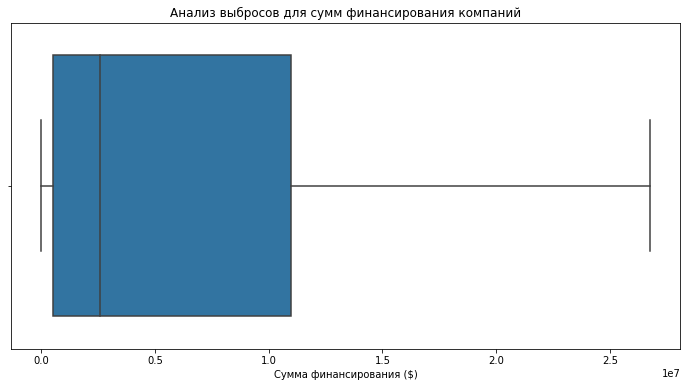

In [56]:
# Ящик с усами
plt.figure(figsize=(12, 6))
# Добавим showfliers=False, чтобы избавиться от выбросов на боксплоте
sns.boxplot(x=company_and_rounds_df_filtered['funding_total'], showfliers=False)
plt.title('Анализ выбросов для сумм финансирования компаний')
plt.xlabel('Сумма финансирования ($)')
plt.show()

После того, как избавились от нулей, можно увидеть, что типичная сумма финансирования(медиана) равна примерно 2,5 млн.долларов. Суммы свыше 11 млн. являются уже не типичными (выбросы), но кроме того есть суммы аномально высокие. Самое большое значение 5,7 млрд. дол. Насколько это корректная сумма сказать сложно, это нужно исследовать подробнее.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [57]:
# Отфильтруем нужные компании с price_amount = 0 или 1, и funding_total > 0
filtered_companies = company_and_rounds_df_filtered[
    ((company_and_rounds_df_filtered['price_amount'] == 0) | 
     (company_and_rounds_df_filtered['price_amount'] == 1)) & 
    (company_and_rounds_df_filtered['funding_total'] > 0)
]

# Вывод результата
filtered_companies

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
66,"10,054.0",Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,"121,500,000.0",3.0,"9,288.0","23,283.0","10,054.0",cash_and_stock,0.0,2013-08-13
170,"101,312.0",SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,"4,000,000.0",2.0,"9,653.0","11,391.0","101,312.0",NaN,0.0,2013-09-18
177,"101,340.0",ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,"250,000.0",1.0,"7,272.0","1,972.0","101,340.0",NaN,0.0,2012-06-18
181,"10,137.0",Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,"1,310,000.0",2.0,"8,254.0",757.0,"10,137.0",cash_and_stock,0.0,2012-11-05
184,"10,139.0",TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,"44,925,000.0",1.0,"9,326.0","44,008.0","10,139.0",NaN,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196402,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,"3,900,000.0",0.0,"7,024.0",317.0,99.0,NaN,0.0,2010-09-22
196411,"9,905.0",UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,"5,172,350.0",0.0,"3,381.0","41,119.0","9,905.0",NaN,0.0,2010-06-24
196430,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,"10,000,000.0",1.0,"9,916.0","19,182.0",992.0,NaN,0.0,2010-07-02
196489,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,"14,500,000.0",3.0,"9,121.0",415.0,997.0,NaN,0.0,2013-07-15


In [58]:
from scipy.stats import percentileofscore

# Сортируем данные
sorted_funding = sorted(filtered_companies['funding_total'])

# Рассчитываем квартили
Q1 = filtered_companies['funding_total'].quantile(0.25)
Q3 = filtered_companies['funding_total'].quantile(0.75)

# Рассчитываем IQR
IQR = Q3 - Q1

# Рассчитываем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим процентили для границ с использованием функции percentileofscore
lower_percentile = percentileofscore(sorted_funding, lower_bound)
upper_percentile = percentileofscore(sorted_funding, upper_bound)

# Выводим результаты
print(f"Первый квартиль (Q1): {Q1}")
print(f"Третий квартиль (Q3): {Q3}")
print(f"Межквартильный размах (IQR): {IQR}")
print("\n")
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Соответствует процентилю: {lower_percentile:.2f}%")
print("\n")
print(f"Верхняя граница выбросов: {upper_bound}")
print(f"Соответствует процентилю: {upper_percentile:.2f}%")


Первый квартиль (Q1): 2000000.0
Третий квартиль (Q3): 15500000.0
Межквартильный размах (IQR): 13500000.0


Нижняя граница выбросов: -18250000.0
Соответствует процентилю: 0.00%


Верхняя граница выбросов: 35750000.0
Соответствует процентилю: 90.91%



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [59]:
# Фильтруем данные, исключая нулевые значения и пропуски в price_amount
filtered_df = company_and_rounds_df_new[company_and_rounds_df_new['price_amount'].notna() & (company_and_rounds_df_new['price_amount'] != 0)]

# Группируем по category_code и считаем среднее значение и стандартное отклонение
grouped_data = filtered_df.groupby('category_code').agg(
    price_mean=('price_amount', 'mean'),
    price_std=('price_amount', 'std')
).reset_index()

grouped_data

,category_code,price_mean,price_std
0,advertising,"259,670,119.04761904","495,483,858.2133485"
1,analytics,"181,000,000.0","92,967,736.33901171"
2,automotive,"2,547,666,666.6666665","2,581,669,292.01502"
3,biotech,"735,915,254.7528517","1,968,195,263.65611"
4,cleantech,"482,316,153.84615386","874,419,628.2576156"
5,consulting,"293,671,562.5","1,018,108,961.7081187"
6,ecommerce,"241,516,200.22","281,425,549.3697293"
7,education,"133,315,000.0","288,329,370.9457987"
8,enterprise,"22,959,545,724.13793","241,358,098,250.8973"
9,fashion,"187,500,000.0","86,494,219.46003097"


In [60]:
# Найдём верхние квартили для средней цены и отклонения
upper_bound_mean = grouped_data['price_mean'].quantile(0.75)  # Верхний квартиль для средней цены
upper_bound_std = grouped_data['price_std'].quantile(0.75)  # Верхний квартиль для стандартного отклонения

# Выбираем категории с высоким средним значением цен и значительным разбросом
high_price_categories = grouped_data[
    (grouped_data['price_mean'] > upper_bound_mean) | 
    (grouped_data['price_std'] > upper_bound_std)
]

# Выводим результат
high_price_categories

,category_code,price_mean,price_std
2,automotive,"2,547,666,666.6666665","2,581,669,292.01502"
3,biotech,"735,915,254.7528517","1,968,195,263.65611"
8,enterprise,"22,959,545,724.13793","241,358,098,250.8973"
10,finance,"604,397,500.0","1,052,920,128.9840255"
11,games_video,"445,937,852.95454544","1,463,477,654.295366"
13,health,"1,065,050,000.0","1,927,099,525.3373802"
16,manufacturing,"813,757,160.6190476","1,060,434,506.3313876"
24,other,"528,772,089.29761904","2,060,860,617.080053"
26,public_relations,"1,820,630,743.2432432","6,854,337,755.922362"
27,real_estate,"1,465,500,000.0","2,676,302,206.403455"



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [61]:
# Группируем по статусу, рассчитываем среднее значение
funding_stats = company_and_rounds_df_new.groupby('status')['funding_rounds'].agg(['mean']).round(2).reset_index()

# Выводим результат
funding_stats

,status,mean
0,acquired,0.53
1,closed,1.38
2,ipo,1.93
3,operating,1.52


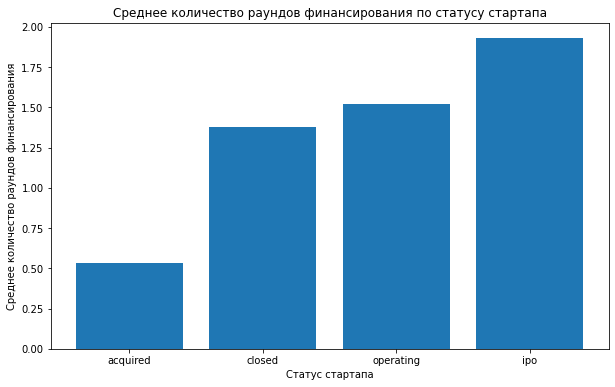

In [62]:
# Сортируем данные по среднему количеству раундов
funding_stats_sorted = funding_stats.sort_values(by='mean')

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(funding_stats_sorted['status'], funding_stats_sorted['mean'])

# Подписи и заголовок
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.title('Среднее количество раундов финансирования по статусу стартапа')

# Отображаем диаграмму
plt.show()

Меньше всего раундов (0,58) было у компаний, которые уже проданы. В среднем перед тем, как стартап продаётся успевает пройти не более 1 раунда финансирования. Далее идут компании, которые закрылись, но перед их закрытием в среднем проходит 1,4 раундов финансирования. На том же уровне находятся компании со статусом operating	 - 1,5 раунда. А вот компаниям, которые ещё не проданы, но развиваются и уже доросли до статуса IPO потребовалось в среднем 2 раунда финансирования.


## Шаг 4. Итоговый вывод и рекомендации

Проведено первичное знакомство с данными, заменены типы данных на корректные, там где это требовалось. Проведена предобработка данных и их предварительное исследование.

Был обработан проблемный дадасет `company_and_rounds.csv`. Данные были приведены в вид, который позволил провести анализ в разрезе отдельных компаний.

В ходе работы были получены следующие выводы:

- Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. 
- К 2013 интерес к инвестированию однозначно вырос - выросло и количество проектов и суммы которые в них были инвестированы. 
- В подавляющем числе компаний числится не более 1-10 людей. Из почти 23000 компаний ИП являются 18126, 4651 малых компаний, средних 103 и больших 13
- Доля сотрудников, которые не имеют образования у ИП, малых и средних компаний в среднем 46%. Для больших компаний доля составляет 28%
- Типичная сумма финансирования равна примерно 2,5 млн.долларов. Суммы свыше 11 млн. являются уже не типичными (выбросы), но кроме того есть суммы аномально высокие. Самое большое значение 5,7 млрд. дол.
- Есть 1618 проданных компаний для которых осуществлялось финансирование, которые проданы за 0 или 1 доллар по данным. Типичные суммы финансирования для них в диапазоне от 2 000 000 до 15 500 000 долларов. 
- Категории стартапов с типично высокими ценами и наибольшим разбросом цен:
`automotiv`, `biotech`, `enterprise`, `finance`, `games_video`, `health, manufacturing`, `other`, `public_relations`, `real_estate`, `security`, `sports`
- Меньше всего раундов (0,58) было у компаний, которые уже **проданы**. В среднем перед тем, как стартап продаётся успевает пройти не более 1 раунда финансирования. Далее идут компании, которые **закрылись**, но перед их закрытием в среднем проходит 1,4 раундов финансирования. На том же уровне находятся компании со статусом **operating** - 1,5 раунда. А вот компаниям, которые ещё не проданы, но развиваются и уже доросли до статуса **IPO** потребовалось в среднем 2 раунда финансирования.
